ChEn-5310: Computational Continuum Transport Phenomena Spring 2022 UMass Lowell; Prof. V. F. de Almeida **10Feb22**

# 16. Rayleigh-Ritz Method w/ Finite Element Lagrange Basis Functions
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Gmtrx}{\boldsymbol{\mathsf{G}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Eigenvalue Problem with Dirichlet Boundary Conditions](#problem)
1. [Rayleigh-Ritz Method with Dirichlet Boundary Conditions](#rayleigh-ritz)
   + [Data](#data)
   + [Finite Element Lagrange Basis Functions](#fem-lagrange-basis)
   + [Results](#results)
---

## [Objectives](#toc)<a id="obj"></a>

 + Describe the Rayleigh-Ritz method for solving linear differential equations with symmetric positive definite operators (OneNote [Engy-5310-rayleigh-ritz-method](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EsTzIb2Mcv5OkcSk0kSXXF8BXM4OnlzGfAd7sdcWLky-Gw?e=FQvvy1)).
 + Use the function approximation theory described in the course (see previous notebooks and notes).
 + Apply the finite element Lagrange basis functions.

## [Poisson Eigenvalue Problem with Dirichlet Boundary Conditions](#toc)<a id="problem"></a>

The following sections describe what is referred to in the literature as the one-dimensional Poisson problem with Dirichlet boundary conditions. This is a classical boundary-value problem of mathematics.

The motion of a quantum free particle of mass $\mu$ and energy $E$ confined to a box of size $L$ is described by the Schrodinger equation and the following associated problem of finding the wave function $\psi:[0,L]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\frac{\hbar^2}{\\2\mu} \frac{d^2\psi}{\\dx^2} + V(x)\,\psi &= E\,\psi \quad\quad \forall \quad\quad x\in\ ]0,L[, \\
  \psi(0) &= 0, \\
  \psi(L) &= 0,
\end{align*}

with no potential energy $V(x)\equiv 0$.

In this course's notation, it is equivalent to solving the Poisson model problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D\, u'\bigr)'(x) + E\,u(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 u(a) &= 0, \\
 u(b) &= 0.
\end{align*}
   
This problem is linear and has an analytical solution for given data: diffusion coefficient, $D$, source, and $E$ slope. The *diffusion flux* associated to the quantity $u$, is denoted $q := -D\,u'$, and it is often of interest as a derived quantity.

The normal diffusive flux at $x=b$ is $q_n(b) = -D\,u'(b) = q_{nb}$

The values of the dependent variable are given on the two end points of the domain. This is called *essential* boundary conditions or  *Dirichlet boundary conditions*. If the values are equal to zero, the boundary condition is referred to as homogeneous.

## [Rayleigh-Ritz Method w/ Dirichlet Boundary Conditions](#toc)<a id="rayleigh-ritz"></a>

Find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals  \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
   \norm{u_0-u^*_N}^2_{\Ecal} = \min\limits_{u_0\, \in\, V} \norm{u_0-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(a) = u_N(b) = 0, (u'_N,u'_N) < \infty \bigr\}$, $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
  \overset{(N\times N)}{\Amtrx} \,\overset{(N\times 1)}{\cvec^*}  = 
  \biggl(\overset{(N\times N)}{\Dmtrx} - E\,\overset{(N\times N)}{\Gmtrx}\biggr)\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\zerovec ,
\end{equation*}

where:
  + $A_{i,j} = \bigl(D\,\phi'_i,\phi'_j\bigr) - E\bigl(\phi_i,\phi_j\bigr)$
  
This formulation uses basis functions that satisfy the left homogeneous boundary condition, however the linear algebraic problem for the optimum coefficients accounts for the inhomogeneous boundary condition data through the lift function $w$.

### [Data](#toc)<a id="data"></a>

Solve problem with parameter values:

> + a = 0
> + b = $2\,r_\text{vdw}$  (diameter of atom)
> + D = $\frac{\hbar^2}{\\2\mu} $

In [26]:
'''SI units'''
from scipy import constants as unit
from scipy import constants as const
unit.meter = 1

In [27]:
'''Importing the mendeleev package'''

try:
    import mendeleev  # creates the `name` mendeleev
except ImportError:
    print('Installing the "mendeleev" package...')
    print('')
    !pip install mendeleev
    import mendeleev
    
from mendeleev import element

In [28]:
'''Choose chemical element where the particle (electron) is localized'''

element_name = 'Phosphorus' # capitalized name
ele = element(element_name)
vdw_radius = ele.vdw_radius * unit.pico*unit.meter

In [29]:
'''Domain'''
x_a = 0*unit.angstrom
x_b = 2*vdw_radius

In [30]:
'''Parameters and data'''
hbar = const.hbar
mu = const.m_e
diffusion_coeff = hbar**2/2/mu

In [41]:
'''Build the basis functions'''

from engy_5310.toolkit import LagrangeFEMBasis 

degree = 2
n_elem = [10] 

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_b], bc_x_min='dirichlet', bc_x_max='dirichlet')
femlb.plot(n_plot_pts=400)

ModuleNotFoundError: No module named 'engy_5310'

  + $A_{i,j} = \bigl(D\,\phi'_i,\phi'_j\bigr) - E\bigl(\phi_i,\phi_j\bigr)$

In [32]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff, "u'", "v'")
g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v')

In [33]:
import numpy as np
    
if np.linalg.matrix_rank(d_mtrx) == min(d_mtrx.shape):
    print('D is full rank.')
else:
    print('D is rank deficient.')

if np.linalg.matrix_rank(g_mtrx) == min(g_mtrx.shape):
    print('G is full rank.')
else:
    print('G is rank deficient.')

D is full rank.
G is full rank.


In [34]:
'''Compute optimal coefficient eigenvectors'''
import scipy
lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx, g_mtrx)

In [40]:
import numpy as np
import math
np.set_printoptions(precision=5)
energy_dimensionless = lambda_vec/(diffusion_coeff*math.pi**2/x_b**2)
print('E [hbar^2/2/mu*pi^2/L^2] = ', energy_dimensionless[:5])
quantum_numbers = np.round(np.sqrt(energy_dimensionless),1)
print('Quantum numbers = ', quantum_numbers[:5])

NameError: name 'lambda_vec' is not defined

In [36]:
'''Build the best approximation function in V_N'''

def u_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x)@c_star_vec
    return u_0

In [37]:
'''Build the derivative '''

def u_prime_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_0

In [38]:
'''Build the best approximation function in V_N'''

def u_flux_x(x, c_star_vec):
    return -diffusion_coeff*u_prime_star(x, c_star_vec)

In [39]:
'''Table of results for the fundamental mode'''

x_table = np.linspace(x_a, x_b, 25)

c_star_vec = eigen_vec[:,0]/scipy.linalg.norm(eigen_vec[:,0])
u_values = u_star(x_table, c_star_vec)
(normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
u_values /= u_values[normalizing_val[0]]
flux_values = u_flux_x(x_table, c_star_vec)
(normalizing_val, ) = np.where(np.abs(flux_values) == np.abs(flux_values).max())
flux_values /= flux_values[normalizing_val[0]]

print('First Quantum Number')
print('')

print("   x [A]        u [a.u.]      -D u'_x [a.u.]")
for i,(x,t,q)in enumerate(zip(x_table, u_values, flux_values)):
    print('%2i)'%(i+1), ' %2.2f'%(x/unit.angstrom), '       %3.5f'%t, '      %3.5f'%q)

First Quantum Number

   x [A]        u [a.u.]      -D u'_x [a.u.]
 1)  0.00        0.00000       1.00000
 2)  0.15        0.13063       0.97974
 3)  0.30        0.25858       0.95948
 4)  0.45        0.38290       0.91546
 5)  0.60        0.49983       0.85666
 6)  0.75        0.60888       0.79010
 7)  0.90        0.70710       0.69851
 8)  1.05        0.79324       0.60693
 9)  1.20        0.86611       0.49464
10)  1.35        0.92377       0.37923
11)  1.50        0.96597       0.25688
12)  1.65        0.99142       0.12895
13)  1.80        1.00000       0.00102
14)  1.95        0.99142       -0.12895
15)  2.10        0.96597       -0.25688
16)  2.25        0.92377       -0.37923
17)  2.40        0.86611       -0.49464
18)  2.55        0.79324       -0.60693
19)  2.70        0.70710       -0.69851
20)  2.85        0.60888       -0.79010
21)  3.00        0.49983       -0.85666
22)  3.15        0.38290       -0.91546
23)  3.30        0.25858       -0.95948
24)  3.45        0.13063  

In [37]:
'''Plot neutron flux modes'''
from engy_5310.toolkit import color_map

def plot_modes(k_vec, eigen_vec):

    k_vec = k_vec.round(5)
    n_pts = 300
    x = np.linspace(x_a, x_b, n_pts)
    
    
    import matplotlib.pyplot as plt
    plt.style.use('classic')
    (fig, ax1) = plt.subplots(1, figsize=(14, 5))
    ax2 = ax1.twinx()
    
    colors = color_map(k_vec.shape[0])

    for j,k in enumerate(k_vec):
        c_star_vec = eigen_vec[:,j]/scipy.linalg.norm(eigen_vec[:,j])
        
        u_values = u_star(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
        u_values /= u_values[normalizing_val[0]]

        u_flux_x_values = u_flux_x(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_flux_x_values) == np.abs(u_flux_x_values).max())
        u_flux_x_values /= u_flux_x_values[normalizing_val[0]]

        ax1.plot(x/unit.angstrom, u_values, '-', label=r'wave function $n$=%2.2f'%k, color=colors[j])
        
        ax1.set_xlabel(r'$x$ [A]', fontsize=18)
        ax1.set_ylabel(r'$u_N$ [a.u.]', fontsize=18, color='black')
        ax1.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax1.tick_params(axis='x', labelsize=16)
        ax1.legend(loc='upper left', fontsize=12)
        ax1.grid(True)
        
        ax2.plot(x/unit.angstrom, u_flux_x_values,'--', color=colors[j], label='flux $n$=%2.2f'%k)

        ax2.set_ylabel(r"$-D\,u'_N$ [a.u.]", fontsize=16, color='black')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax2.legend(loc='upper right', fontsize=12)
        
    plt.title(r'Electron Energy Modes ($n$=%s # elem=%s, N=%i)'%(str(list(k_vec)),n_elem,len(femlb.basis_func_list)), fontsize=20)
    plt.show()

ModuleNotFoundError: No module named 'engy_5310'

In [38]:
plot_modes(quantum_numbers[0:1], eigen_vec[:,0:1])

NameError: name 'plot_modes' is not defined

In [39]:
plot_modes(quantum_numbers[1:5], eigen_vec[:,1:5])

NameError: name 'plot_modes' is not defined

# Assignment 1 

### Particle in Box: 


 Imagine a classical free particle of mass μ and energy E is bouncing back and forth between walls separated by a distance L apart. This is sometimes called the particle in a box. One wall is at x = 0 and the other is at x = L, where L is the length of the box. Wave functions for the particle in a box must satisfy ψ(0) = ψ(L) = 0.
You can use any arbitrary potential function, in this case potential is zero in the box (x from 0 to L).

Consider the wave function; $ ψ(x) =  Asin(kx)   $ for $ 0 < x < L $ and $ ψ(x) = 0 $ for  elsewhere. 
To find "A", we use the normalization equation: 

$ \int_{0}^{L} |ψ(x)|^2dx = 1 $      then : $ A = \sqrt{\frac{2}{\\L}} $


This wave function must satisfies the Schrodinger eq:

$    -\frac{h^2}{\\2μ} \frac{d^2ψ}{\\dx^2} + V(x)ψ = Eψ           $,   in which $ V(x)$ is zero and $kL = πn$ for n = 1, 2, ...


 With B.C: 
 $ ψ(0) = ψ(L) = 0 $
 
The energy eigenstates |n> have wave functions:

$ ψ_n(x) =  \sqrt{\frac{2}{\\L}} sin(k_nx) $

where $ k_n = πn/L $ and $ n = 1, 2, ...$ Again, we have a discrete quantum number n labeling the possible states. By substitution this wave function in Schrodinger equation, their energies can be obtained by:


$    \frac{h^2}{\\2μ} \sqrt{\frac{2}{\\L}}k_n^2 sin(k_nx)  + V(x)\sqrt{\frac{2}{\\L}} sin(k_nx) = E\sqrt{\frac{2}{\\L}} sin(k_nx)           $

we had $ V(x) = 0 $

$    \frac{h^2}{\\2μ} k_n^2   = E           $



$ E_n = \frac{h^2 k_n^2}{\\2μ} =  \Bigg(\frac{π^2 h^2}{\\2μL^2}\Bigg) n^2                                             $

Energy levels and stationary state wave functions for the particle in a 1-D box. It is a common convention for the wave functions to be drawn on the corresponding energy level.



Text(0.5, 1.0, 'Particle in Box')

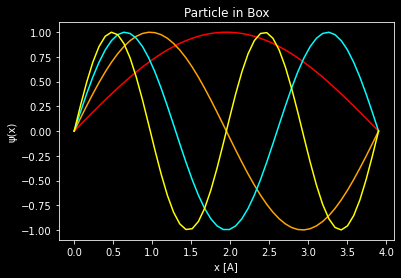

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('dark_background')

L=3.9 # Angstrom

def f(x,n):
    return np.sin(n*x*np.pi/L)

xlist=np.linspace(0 ,L)
ylist=f(xlist, 1)
zlist=f(xlist, 2)
glist=f(xlist, 3)
mlist=f(xlist, 4)
alist=f(xlist, 5)
plist=f(xlist, 6)
hlist=f(xlist, 7)
klist=f(xlist, 8)
plt.plot(xlist,ylist, label="W1'[]", color='red')
plt.plot(xlist,zlist , label="W2", color='orange')
plt.plot(xlist,glist , label="W3", color='cyan')
plt.plot(xlist,mlist,label='W4', color='yellow')
#plt.plot(xlist,alist ,label='W5', color='pink')
#plt.plot(xlist,plist ,label='W6', color='purple')
#plt.plot(xlist,hlist ,'--',label='W7', color='pink')
#plt.plot(xlist,klist ,label='W8', color='orange')
plt.xlabel('x [A]');plt.ylabel('ψ(x)')
plt.title('Particle in Box' )
    